In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [34]:
df = pd.read_csv("/content/sample_data/credit_features_subset.csv")  # Update the filename if needed
df.head()
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Shape: (8847, 14)

Missing values:
 UID                                     0
ALL_AgeOfOldestAccount                  0
ALL_AgeOfYoungestAccount                0
ALL_Count                               0
ALL_CountActive                         0
ALL_CountClosedLast12Months             0
ALL_CountDefaultAccounts                0
ALL_CountOpenedLast12Months             0
ALL_CountSettled                        0
ALL_MeanAccountAge                      0
ALL_SumCurrentOutstandingBal            0
ALL_SumCurrentOutstandingBalExcMtg      0
ALL_TimeSinceMostRecentDefault          0
ALL_WorstPaymentStatusActiveAccounts    0
dtype: int64


In [35]:
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    if col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

In [36]:
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)
cat_cols = ['Education', 'Property_Area']
le = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [37]:
if 'Loan_Status' in df.columns:
    df['Risk'] = df['Loan_Status']
    df.drop('Loan_Status', axis=1, inplace=True)
else:
    print("Warning: 'Loan_Status' column not found. Please define your target variable.")

In [41]:
if 'Risk' in df.columns:
    X = df.drop('Risk', axis=1)
    y = df['Risk']
else:
    print("Warning: 'Risk' column not found. Please define your target variable.")


In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6847457627118644

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        20
           0       0.89      0.98      0.93      1121
           1       0.23      0.34      0.28       193
           2       0.24      0.22      0.23       100
           3       0.04      0.01      0.02        68
           4       0.09      0.01      0.02        71
           5       0.13      0.04      0.06        48
           6       0.00      0.00      0.00        44
           7       0.00      0.00      0.00        24
           8       0.00      0.00      0.00        15
           9       0.06      0.04      0.05        24
          10       0.18      0.18      0.18        11
          11       0.12      0.07      0.09        14
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5
          15       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true s

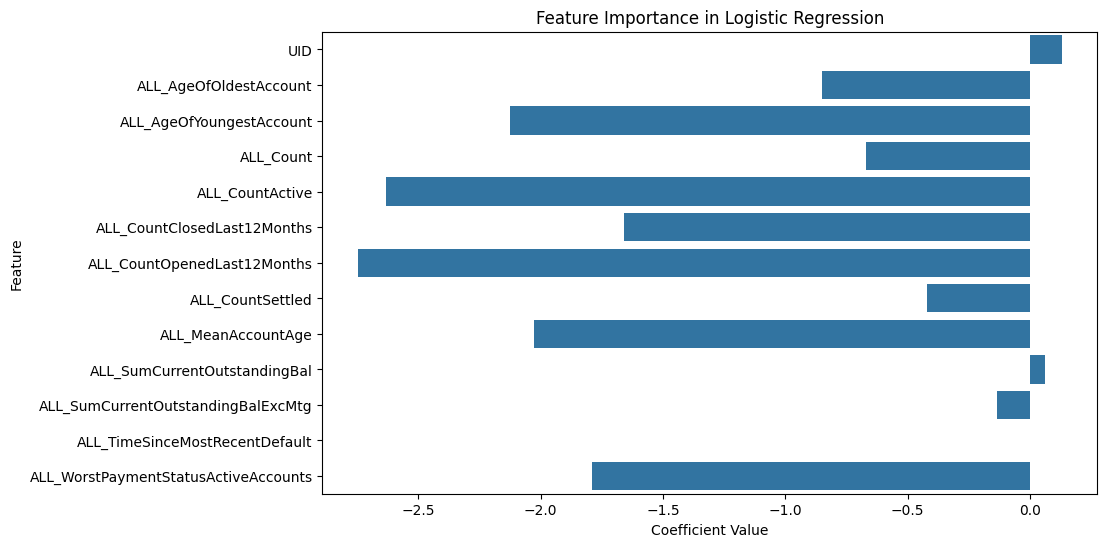

In [40]:
importance = model.coef_[0]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()